#Data Arguments

In [1]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow import keras

In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\pc\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: tf_keras
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show keras

Name: keras
Version: 3.11.3
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: c:\Users\pc\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory 
from keras.utils import array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [11]:
import tensorflow.keras as keras

In [12]:
img = load_img(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Thar.jpeg")

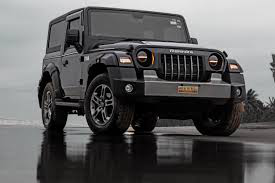

In [13]:
img

In [14]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\image_create",
                          save_prefix='thar', save_format='jpeg'):
    i += 1
    if i > 30:
        break

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)


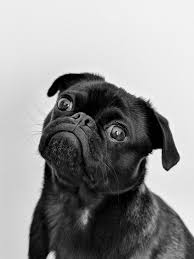

In [17]:
img = load_img(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Black dog.jpeg")
img

In [19]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\image_create",
                          save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 10:
        break

In [23]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,           # Only set if include_top=False
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


# Basic Prediction of the image
# RESNET50

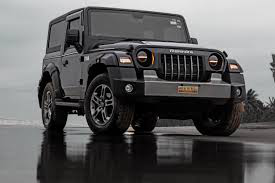

In [28]:
from keras.utils import array_to_img, img_to_array, load_img
img = load_img(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Thar.jpeg")
img

In [32]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# load Data
model = ResNet50(weights='imagenet')

# load and input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Thar.jpeg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array,axis=0)
img_array = preprocess_input(img_array)

# Make prediction
predictions = model.predict(img_array)

# Decoded and print
decode_predictions = decode_predictions(predictions, top=3)[0]

print("predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")    

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predictions:
1: jeep (0.98)
2: half_track (0.01)
3: trailer_truck (0.00)

Top Prediction Class Index: 609


# ResNet50V2

In [34]:
import numpy as np
from tensorflow.keras.applications.resnet_v2 import ResNet50V2,preprocess_input,decode_predictions

from tensorflow.keras.preprocessing import image

model = ResNet50V2(weights='imagenet')

img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)

decode_predictions = decode_predictions(predictions, top=3)[0]

print("predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")    

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predictions:
1: golden_retriever (1.00)
2: Tibetan_mastiff (0.00)
3: Labrador_retriever (0.00)

Top Prediction Class Index: 207


# 4 VGG16

In [3]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions

from tensorflow.keras.preprocessing import image

model = VGG16(weights='imagenet')

img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\images.jpeg"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)

decode_predictions = decode_predictions(predictions, top=3)[0]

print("predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions):
    print(f"{i + 1}: {label} ({score:2f})")

top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")    

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 173s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
predictions:
1: ping-pong_ball (0.499358)
2: pool_table (0.088500)
3: piggy_bank (0.067455)

Top Prediction Class Index: 722


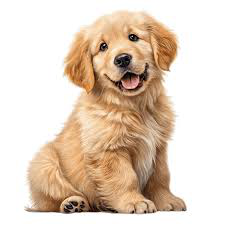

In [4]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg")
img

In [5]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions

from tensorflow.keras.preprocessing import image

model = VGG16(weights='imagenet')

img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)

decode_predictions = decode_predictions(predictions, top=3)[0]

print("predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions):
    print(f"{i + 1}: {label} ({score:2f})")

top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")    

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step
predictions:
1: golden_retriever (0.854586)
2: Tibetan_mastiff (0.086740)
3: Newfoundland (0.027368)

Top Prediction Class Index: 207


In [ ]:
#   VGG19

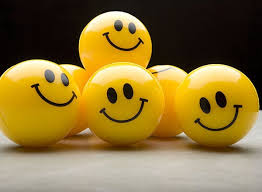

In [6]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\images.jpeg")
img

In [7]:
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

model = VGG19(weights = 'imagenet')

img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg"

img = image.load_img(img_path,target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)

decode_predictions = decode_predictions(predictions, top=8)[0]

print("predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions):
    print(f"{i + }: {label} ({score:2f})")

top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")    

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 1563s 3us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predictions:

Top Prediction Class Index: 207

Top Prediction Class Index: 207

Top Prediction Class Index: 207

Top Prediction Class Index: 207

Top Prediction Class Index: 207

Top Prediction Class Index: 207

Top Prediction Class Index: 207

Top Prediction Class Index: 207

Top Prediction Class Index: 207


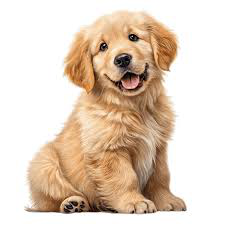

In [8]:
from keras.utils import array_to_img, img_to_array, load_img
img = load_img(r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg")
img

# ResNet50

In [12]:
import numpy as np
import time
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# 1️⃣ Load the pre-trained ResNet50V2 model
model = ResNet50V2(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg"  # ✅ update your path
img = image.load_img(img_path, target_size=(224, 224))   # ResNet50V2 expects 224x224
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)            # Add batch dimension
img_array = preprocess_input(img_array)                  # Normalize for ResNetV2

# 3️⃣ Run inference and measure time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode the top 5 predictions
decoded_preds = decode_predictions(predictions, top=5)[0]

print("🎯 Top 5 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_preds):
    print(f"{i + 1}. {label:25s} ({score * 100:.2f}%)")

# 5️⃣ Get top prediction index
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️  Top Prediction Class Index: {top_class_index}")

# 6️⃣ Measure inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Model information
model_size_MB = model.count_params() * 4 / (1024 ** 2)
print(f"💾 Model Size: {model_size_MB:.2f} MB")

num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🎯 Top 5 Predictions:
1. golden_retriever          (99.87%)
2. Tibetan_mastiff           (0.07%)
3. Labrador_retriever        (0.01%)
4. chow                      (0.01%)
5. Sussex_spaniel            (0.01%)

🏷️  Top Prediction Class Index: 207
⚡ Inference Time: 2294.53 ms
💾 Model Size: 97.71 MB
🧠 Parameters: 25613800
📏 Depth (Layers): 192


# ResNet50V2

In [14]:
import numpy as np
import time
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# 1️⃣ Load the pre-trained ResNet50V2 model
model = ResNet50V2(weights='imagenet')

# 2️⃣ Load and preprocess your image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg"  # ← change this path if needed
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)

# 3️⃣ Predict and measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode top-5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]

print("🎯 Top-5 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}. {label:25s} ({score * 100:.2f}%)")

# 5️⃣ Top class index
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️  Top Prediction Class Index: {top_class_index}")

# 6️⃣ Inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Model info
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per param (float32)
print(f"💾 Model Size: {model_size_MB:.2f} MB")

num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🎯 Top-5 Predictions:
1. golden_retriever          (99.87%)
2. Tibetan_mastiff           (0.07%)
3. Labrador_retriever        (0.01%)
4. chow                      (0.01%)
5. Sussex_spaniel            (0.01%)

🏷️  Top Prediction Class Index: 207
⚡ Inference Time: 3319.07 ms
💾 Model Size: 97.71 MB
🧠 Parameters: 25613800
📏 Depth (Layers): 192


# VGG19

In [16]:
import numpy as np
import time
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# 1️⃣ Load the VGG19 model pre-trained on ImageNet
model = VGG19(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg"  # replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Optionally, get the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️  Top Prediction Class Index: {top_class_index}")

# 6️⃣ Calculate and print inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32 param
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Get model details
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
🎯 Predictions:
1: golden_retriever (94.43%)
2: Tibetan_mastiff (3.75%)
3: tennis_ball (0.56%)
4: Sussex_spaniel (0.46%)
5: Newfoundland (0.24%)

🏷️  Top Prediction Class Index: 207
⚡ Inference Time: 1068.79 ms
💾 Model Size: 548.05 MB
🧠 Parameters: 143667240
📏 Depth (Layers): 26


# VGG16

In [17]:
import numpy as np
import time
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# 1️⃣ Load the VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\dog.jpeg"  # replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Optionally, get the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️  Top Prediction Class Index: {top_class_index}")

# 6️⃣ Calculate and print inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32 param
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Get model details
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
🎯 Predictions:
1: golden_retriever (85.46%)
2: Tibetan_mastiff (8.67%)
3: Newfoundland (2.74%)
4: Sussex_spaniel (1.24%)
5: Tibetan_terrier (0.53%)

🏷️  Top Prediction Class Index: 207
⚡ Inference Time: 1381.06 ms
💾 Model Size: 527.79 MB
🧠 Parameters: 138357544
📏 Depth (Layers): 23


# Xception

In [18]:
import numpy as np
import time
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

# 1️⃣ Load the Xception model pre-trained on ImageNet
model = Xception(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Thar.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(299, 299))  # Xception requires 299x299 input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Optionally, get the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️  Top Prediction Class Index: {top_class_index}")

# 6️⃣ Calculate and print inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32 param
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Get model details
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 199s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🎯 Predictions:
1: jeep (95.28%)
2: pickup (0.91%)
3: half_track (0.34%)
4: limousine (0.27%)
5: car_wheel (0.22%)

🏷️  Top Prediction Class Index: 609
⚡ Inference Time: 3023.18 ms
💾 Model Size: 87.40 MB
🧠 Parameters: 22910480
📏 Depth (Layers): 134


# Inception

In [19]:
import numpy as np
import time
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# 1️⃣ Load the InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Black dog.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 requires 299x299 input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Optionally, get the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️  Top Prediction Class Index: {top_class_index}")

# 6️⃣ Calculate and print inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32 param
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Get model details
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 380s 4us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🎯 Predictions:
1: Brabancon_griffon (67.97%)
2: pug (27.27%)
3: French_bulldog (0.78%)
4: Boston_bull (0.08%)
5: Staffordshire_bullterrier (0.06%)

🏷️  Top Prediction Class Index: 262
⚡ Inference Time: 2768.84 ms
💾 Model Size: 90.99 MB
🧠 Parameters: 23851784
📏 Depth (Layers): 313


# MobileNetV2

In [20]:
import numpy as np
import time
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# 1️⃣ Load the MobileNetV2 model pre-trained on ImageNet data
model = MobileNetV2(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Black dog.jpeg"  # Replace with your image file path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Optionally, get the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️ Top Prediction Class Index: {top_class_index}")

# 6️⃣ Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32 param
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Get the number of parameters and depth
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 23s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🎯 Predictions:
1: Brabancon_griffon (50.47%)
2: pug (45.86%)
3: standard_schnauzer (0.26%)
4: chimpanzee (0.21%)
5: French_bulldog (0.18%)

🏷️ Top Prediction Class Index: 262
⚡ Inference Time: 1555.09 ms
💾 Model Size: 13.50 MB
🧠 Parameters: 3538984
📏 Depth (Layers): 156


# DeseNet121

In [21]:
import numpy as np
import time
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# 1️⃣ Load DenseNet121 pre-trained on ImageNet
model = DenseNet121(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Black dog.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print top-5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Top prediction class index
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️ Top Prediction Class Index: {top_class_index}")

# 6️⃣ Inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Model size in MB
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Number of parameters and depth
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 75s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
🎯 Predictions:
1: pug (71.27%)
2: Brabancon_griffon (26.71%)
3: French_bulldog (1.23%)
4: Boston_bull (0.16%)
5: bull_mastiff (0.09%)

🏷️ Top Prediction Class Index: 254
⚡ Inference Time: 4251.59 ms
💾 Model Size: 30.76 MB
🧠 Parameters: 8062504
📏 Depth (Layers): 429


# NASNetMobile

In [22]:
import numpy as np
import time
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# 1️⃣ Load the NASNetMobile model pre-trained on ImageNet
model = NASNetMobile(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Black dog.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print top-5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Top prediction class index
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️ Top Prediction Class Index: {top_class_index}")

# 6️⃣ Inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Model size in MB
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Number of parameters and depth
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


24227760/24227760 ━━━━━━━━━━━━━━━━━━━━ 37s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
🎯 Predictions:
1: pug (48.17%)
2: Brabancon_griffon (37.06%)
3: French_bulldog (0.55%)
4: bull_mastiff (0.47%)
5: Pekinese (0.23%)

🏷️ Top Prediction Class Index: 254
⚡ Inference Time: 8038.84 ms
💾 Model Size: 20.32 MB
🧠 Parameters: 5326716
📏 Depth (Layers): 771


# NASNetLarge

In [26]:
import numpy as np
import time
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions

# 1️⃣ Load NASNetLarge pre-trained on ImageNet
model = NASNetLarge(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Black dog.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(331, 331))  # NASNetLarge requires 331x331
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print top-5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Top prediction class index
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️ Top Prediction Class Index: {top_class_index}")

# 6️⃣ Inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Model size in MB
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Number of parameters and depth
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


359748576/359748576 ━━━━━━━━━━━━━━━━━━━━ 274s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
🎯 Predictions:
1: Brabancon_griffon (88.09%)
2: pug (2.17%)
3: affenpinscher (0.10%)
4: bull_mastiff (0.06%)
5: boxer (0.05%)

🏷️ Top Prediction Class Index: 262
⚡ Inference Time: 9104.95 ms
💾 Model Size: 339.32 MB
🧠 Parameters: 88949818
📏 Depth (Layers): 1041


# EfficientNetV2BO

In [23]:
import numpy as np
import time
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input, decode_predictions

# 1️⃣ Load EfficientNetV2B0 pre-trained on ImageNet
model = EfficientNetV2B0(weights='imagenet')

# 2️⃣ Load and preprocess the input image
img_path = r"C:\Users\pc\OneDrive\Desktop\Deep Learning\Transfer Learning\Thar.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 3️⃣ Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# 4️⃣ Decode and print top-5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("🎯 Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# 5️⃣ Top prediction class index
top_class_index = np.argmax(predictions[0])
print(f"\n🏷️ Top Prediction Class Index: {top_class_index}")

# 6️⃣ Inference time
inference_time_ms = (end_time - start_time) * 1000.0
print(f"⚡ Inference Time: {inference_time_ms:.2f} ms")

# 7️⃣ Model size in MB
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes per float32
print(f"💾 Model Size: {model_size_MB:.2f} MB")

# 8️⃣ Number of parameters and depth
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"🧠 Parameters: {num_parameters}")
print(f"📏 Depth (Layers): {model_depth}")


29403144/29403144 ━━━━━━━━━━━━━━━━━━━━ 100s 3us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
🎯 Predictions:
1: jeep (86.73%)
2: amphibian (0.61%)
3: ambulance (0.47%)
4: limousine (0.40%)
5: half_track (0.38%)

🏷️ Top Prediction Class Index: 609
⚡ Inference Time: 3770.94 ms
💾 Model Size: 27.47 MB
🧠 Parameters: 7200312
📏 Depth (Layers): 273
